This notebook is to test routines for particles measurements

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import ScalarFormatter

from astropy import units as u
from sunpy import timeseries as ts
from sunpy.net import Fido, attrs as a

from solarmach import SolarMACH
from solo_epd_loader import epd_load

import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

# omit Pandas' PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
# set your local path where you want to save the data files
path = f'{os.getcwd()}/data/'

# make nested directories recursively
os.makedirs(f'/{path}/', exist_ok=True)

# whether missing data files should automatically downloaded from SOAR
autodownload = True

# define some optional plotting settings
color = {'sun': 'crimson', 'asun': 'orange', 'north': 'darkslateblue', 'south': 'c'}  # define SolO/EPD colors

In [16]:
# define start and end date of data to load (year, month, day)

# startdate = dt.datetime(2020, 12, 10)
# enddate = dt.datetime(2020, 12, 11)

startdate = pd.Timestamp('2021-04-17')
enddate = pd.Timestamp('2021-04-19')

# define the sensor to use
sensor = 'ept'

# define data level to use ('l2' or 'll')
level = 'l2'

In [17]:
# load data
df_protons_sun, df_electrons_sun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                      enddate=enddate, viewing='sun',
                                                      path=path, autodownload=True)
df_protons_asun, df_electrons_asun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                        enddate=enddate, viewing='asun',
                                                        path=path, autodownload=True)
df_protons_south, df_electrons_south, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='south',
                                                          path=path, autodownload=True)
df_protons_north, df_electrons_north, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='north',
                                                          path=path, autodownload=True)
df_protons_omni, df_electrons_omni, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='omni',
                                                          path=path, autodownload=True)

solo_L2_epd-ept-asun-rates_20210418_V02.cdf: 2.42MB [00:01, 2.38MB/s]                                                   
solo_L2_epd-ept-asun-rates_20210419_V02.cdf: 4.53MB [00:01, 2.67MB/s]                                                   
solo_L2_epd-ept-north-rates_20210418_V02.cdf: 2.52MB [00:01, 2.48MB/s]                                                  
solo_L2_epd-ept-north-rates_20210419_V02.cdf: 4.75MB [00:01, 2.68MB/s]                                                  
solo_L2_epd-ept-south-rates_20210418_V02.cdf: 2.48MB [00:01, 2.44MB/s]                                                  
solo_L2_epd-ept-south-rates_20210419_V02.cdf: 5.19MB [00:01, 2.78MB/s]                                                  
solo_L2_epd-ept-sun-rates_20210418_V02.cdf: 2.76MB [00:01, 2.45MB/s]                                                    
solo_L2_epd-ept-sun-rates_20210419_V02.cdf: 6.30MB [00:02, 2.81MB/s]                                                    


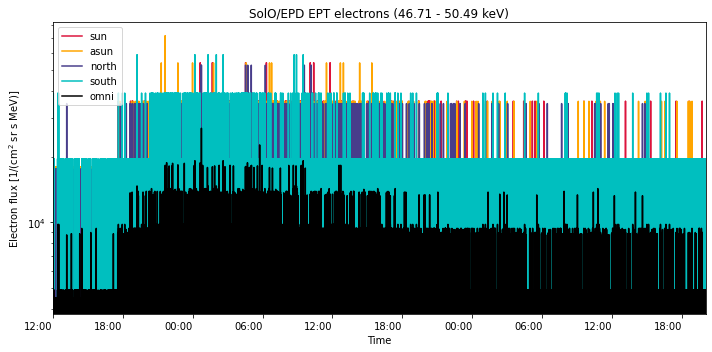

In [19]:
# energy channel to use; cf. "energies" for the energies
channel = 6

fig, ax = plt.subplots(figsize=[10,5])
ax = df_electrons_sun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='sun', 
                                                                        color=color['sun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_asun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='asun', 
                                                                        color=color['asun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_north['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='north', 
                                                                        color=color['north'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_south['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='south', 
                                                                        color=color['south'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_omni['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='omni', 
                                                                        color='black',
                                                                        drawstyle="steps-mid")

ax.set_xlim([pd.Timestamp('2021-04-17 12:00'), pd.Timestamp('2021-04-19 20:00')])

ax.set_ylabel(r'Electron flux [1/(cm$^2$ sr s MeV)]')
ax.set_title(f"SolO/EPD EPT electrons ({1000*energies['Electron_Bins_Low_Energy'][channel]:.2f}"
             + f" - {1000*energies['Electron_Bins_Low_Energy'][channel+1]:.2f} keV)")
ax.legend()
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', rotation=0)
fig.tight_layout()
plt.show()

In [21]:
# define start and end date of data to load (year, month, day):
startdate = pd.Timestamp(2020, 7, 8)
enddate = pd.Timestamp(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

In [ ]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

In [ ]:
fig, axs = plt.subplots(2, sharex=True, figsize=[10,9])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[0].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,9)))
# plot selection of ept electron channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[1].set_prop_cycle('color', plt.cm.autumn(np.linspace(0,1,9)))
# plot selection of ept ion channels
for channel in [6, 13, 22, 29, 32, 40, 48, 56, 62]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylabel(r"Electron flux [1/(cm$^2$ sr s MeV)]")
axs[1].set_ylabel(r"Ion flux [1/(cm$^2$ sr s MeV)]")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Ions/Protons ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.show()

# Using `pyspedas` .. run in `psp` env.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pyspedas
import pytplot
from pytplot import tplot
from pytplot import get_data

import os
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

# plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

time_range = ['2021-09-17', '2021-09-19']

In [2]:
epam_vars = pyspedas.ace.epam(trange=time_range)
print(epam_vars)

30-Apr-24 20:34:51: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/epam/level_2_cdaweb/epm_k0/2021/
30-Apr-24 20:34:52: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210917_v03.cdf to ace_data/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210917_v03.cdf
30-Apr-24 20:34:52: Download complete: ace_data/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210917_v03.cdf
30-Apr-24 20:34:53: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210918_v03.cdf to ace_data/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210918_v03.cdf
30-Apr-24 20:34:53: Download complete: ace_data/epam/level_2_cdaweb/epm_k0/2021/ac_k0_epm_20210918_v03.cdf


['H_lo', 'Ion_very_lo', 'Ion_lo', 'Ion_mid', 'Ion_hi', 'Electron_lo', 'Electron_hi']


In [3]:
# tplot(['H_lo', 'Ion_very_lo', 'Ion_lo', 'Ion_mid', 'Ion_hi', 'Electron_lo', 'Electron_hi'], xsize=10, ysize=17)

In [4]:
# time_H_lo, flux_H_lo = get_data('H_lo', dt=True)
# time_Ion_very_lo, flux_Ion_very_lo = get_data('Ion_very_lo', dt=True)
# time_Ion_lo, flux_Ion_lo = get_data('Ion_lo', dt=True)
# time_Ion_mid, flux_Ion_mid = get_data('Ion_mid', dt=True)
# time_Ion_hi, flux_Ion_hi = get_data('Ion_hi', dt=True)
# time_Electron_lo, flux_Electron_lo = get_data('Electron_lo', dt=True)
# time_Electron_hi, flux_Electron_hi = get_data('Electron_hi', dt=True)

In [5]:
xarray_H_lo = get_data('H_lo', xarray=True, metadata=True)
xarray_Ion_very_lo = get_data('Ion_very_lo', xarray=True, metadata=True)
xarray_Ion_lo = get_data('Ion_lo', xarray=True, metadata=True)
xarray_Ion_mid = get_data('Ion_mid', xarray=True, metadata=True)
xarray_Ion_hi = get_data('Ion_hi', xarray=True, metadata=True)
xarray_Electron_lo = get_data('Electron_lo', xarray=True, metadata=True)
xarray_Electron_hi = get_data('Electron_hi', xarray=True, metadata=True)

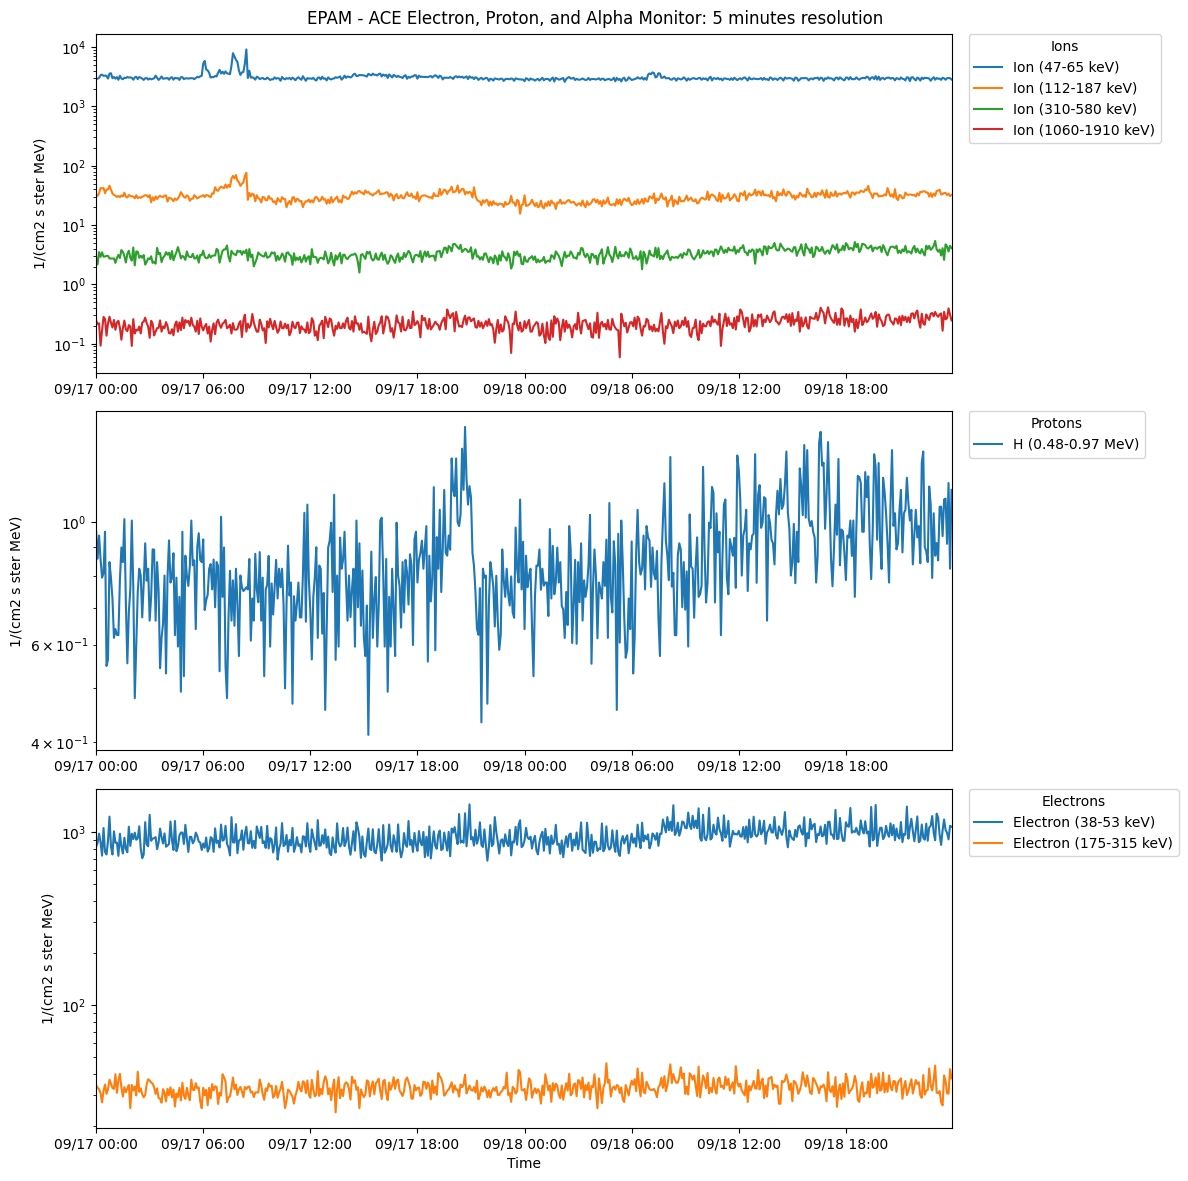

In [6]:
fig = plt.figure(figsize=[12,12])
instrument = xarray_Ion_lo.CDF['GATT']['TEXT'][0]
cadence = xarray_Ion_lo.CDF['GATT']['Time_resolution']
fig.suptitle(f'{instrument}: {cadence} resolution')

ax = fig.add_subplot(311)
ax.plot(xarray_Ion_very_lo.time, xarray_Ion_very_lo.data, label=xarray_Ion_very_lo.CDF['VATT']['LABLAXIS'])
ax.plot(xarray_Ion_lo.time, xarray_Ion_lo.data, label=xarray_Ion_lo.CDF['VATT']['LABLAXIS'])
ax.plot(xarray_Ion_mid.time, xarray_Ion_mid.data, label=xarray_Ion_mid.CDF['VATT']['LABLAXIS'])
ax.plot(xarray_Ion_hi.time, xarray_Ion_hi.data, label=xarray_Ion_hi.CDF['VATT']['LABLAXIS'])
ax.set_yscale('log')
ax.set_ylabel(xarray_Ion_hi.CDF['VATT']['UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Ions')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=xarray_Ion_hi.time[0], right=xarray_Ion_hi.time[-1])

ax = fig.add_subplot(312)
ax.plot(xarray_H_lo.time, xarray_H_lo.data, label=xarray_H_lo.CDF['VATT']['LABLAXIS'])
ax.set_yscale('log')
ax.set_ylabel(xarray_H_lo.CDF['VATT']['UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=xarray_H_lo.time[0], right=xarray_H_lo.time[-1])

ax = fig.add_subplot(313)
ax.plot(xarray_Electron_lo.time, xarray_Electron_lo.data, label=xarray_Electron_lo.CDF['VATT']['LABLAXIS'])
ax.plot(xarray_Electron_hi.time, xarray_Electron_hi.data, label=xarray_Electron_hi.CDF['VATT']['LABLAXIS'])
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(xarray_Electron_lo.CDF['VATT']['UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Electrons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=xarray_Electron_lo.time[0], right=xarray_Electron_lo.time[-1])

fig.tight_layout()
plt.show()

## MAVEN instrument

In [ ]:
sep_vars = pyspedas.maven.sep(trange=time_range)

In [98]:
xarray_forward_maven = get_data('f_elec_flux_tot_s2-cal-svy-full', xarray=True, metadata=True)
xarray_rear_maven = get_data('r_elec_flux_tot_s2-cal-svy-full', xarray=True, metadata=True)

In [122]:
df_maven_f = pd.DataFrame({'time': xarray_forward_maven.time, 'data': xarray_forward_maven.data})
df_maven_r = pd.DataFrame({'time': xarray_rear_maven.time, 'data': xarray_rear_maven.data})

# Get rid of nans
df_maven_f.dropna(inplace=True)
df_maven_r.dropna(inplace=True)

# Set index
df_maven_f['time'] = pd.to_datetime(df_maven_f['time'])
df_maven_f.set_index('time', inplace=True)

df_maven_r['time'] = pd.to_datetime(df_maven_r['time'])
df_maven_r.set_index('time', inplace=True)

# Resample
df_maven_f = df_maven_f.resample('1min').mean()
df_maven_r = df_maven_r.resample('1min').mean()

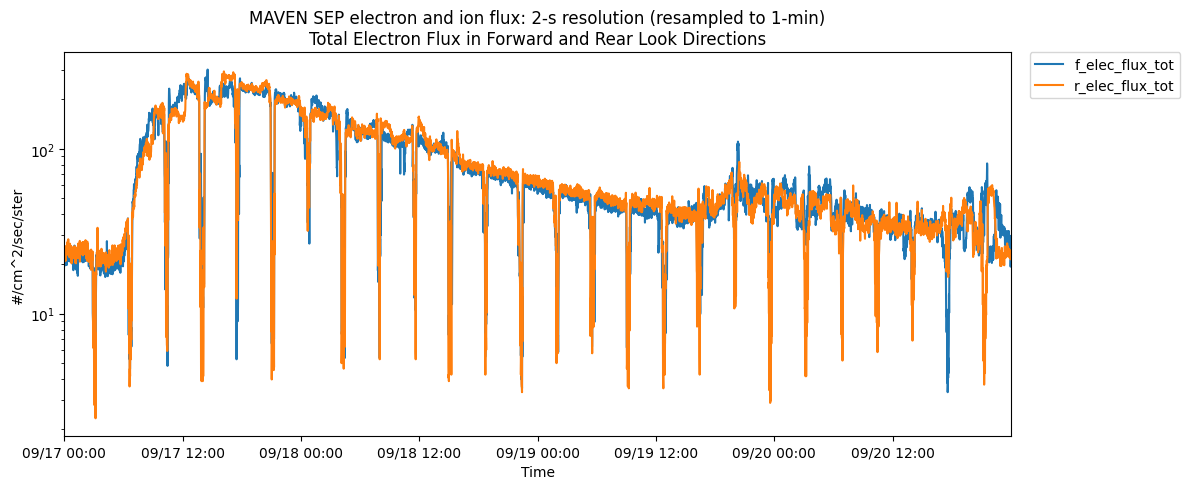

In [145]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111)

instrument = xarray_forward_maven.CDF['GATT']['TEXT']
# description_f = xarray_forward_maven.CDF['VATT']['CATDESC']
# description_r = xarray_rear_maven.CDF['VATT']['CATDESC']
cadence = round(np.nanmedian(np.diff(xarray_forward_maven.time[-10:])).item()/1e9)
# fig.suptitle(f'{instrument}: {cadence}-s resolution (resampled to 1-min)\n{description_f} and {description_r}')
ax.set_title(f'{instrument}: {cadence}-s resolution (resampled to 1-min)\nTotal Electron Flux in Forward and Rear Look Directions')

ax.plot(df_maven_f.index, df_maven_f.data, label=xarray_forward_maven.CDF['VATT']['LABLAXIS'])
ax.plot(df_maven_r.index, df_maven_r.data, label=xarray_rear_maven.CDF['VATT']['LABLAXIS'])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(xarray_forward_maven.CDF['VATT']['UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_maven_f.index[0], right=df_maven_f.index[-1])
fig.tight_layout()
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

---
# Wind/3DP <a class="anchor" id="wind-3dp-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for Wind/3DP instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `'WI_SFSP_3DP'`: Electron omnidirectional fluxes 27 keV - 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfsp_3dp_00000000_v01.skt))
- `'WI_SFPD_3DP'`: Electron energy-angle distributions 27 keV to 520 keV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SFPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sfpd_3dp_00000000_v01.skt))
- `'WI_SOSP_3DP'`: Proton omnidirectional fluxes 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOSP_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sosp_3dp_00000000_v01.skt))
- `'WI_SOPD_3DP'`: Proton energy-angle distributions 70 keV - 6.8 MeV, often at 24 sec ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesW.html#WI_SOPD_3DP), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/wi_sopd_3dp_00000000_v01.skt))

Note that for Wind/3DP, energies are usually provided in eV (and not keV or MeV)!

#### Define options

-  ``dataset``: ``'WI_SFSP_3DP'``, ``'WI_SFPD_3DP'``, ``'WI_SOSP_3DP'``, or ``'WI_SOPD_3DP'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``multi_index``: ``True``, or ``False`` (boolean), optional. Provide output for pitch-angle resolved data as Pandas Dataframe with multiindex. By default ``True``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/wind/3dp/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data>).
-  ``threshold``: Integer or float, optional. Replace all FLUX values in ``df`` above ``threshold`` with ``np.nan``, by default ``None``.

In [5]:
from seppy.loader.wind import wind3dp_load
import datetime as dt

In [6]:
start_time = pd.Timestamp('2021-09-17')
end_time = pd.Timestamp('2021-09-19')
cadence = '1min'

In [7]:
df_wind_e, meta_wind_e = wind3dp_load(dataset='WI_SFSP_3DP',
                                        startdate=start_time,
                                        enddate=end_time,
                                        multi_index=False,
                                        resample=cadence)

df_wind_p, meta_wind_p = wind3dp_load(dataset='WI_SOSP_3DP',
                                        startdate=start_time,
                                        enddate=end_time,
                                        multi_index=False,
                                        resample=cadence)

100%|████████████████████████████████████████| 497k/497k [00:00<00:00, 607MB/s]


100%|████████████████████████████████████████| 498k/498k [00:00<00:00, 607MB/s]


100%|████████████████████████████████████████| 607k/607k [00:00<00:00, 821MB/s]


100%|████████████████████████████████████████| 608k/608k [00:00<00:00, 825MB/s]


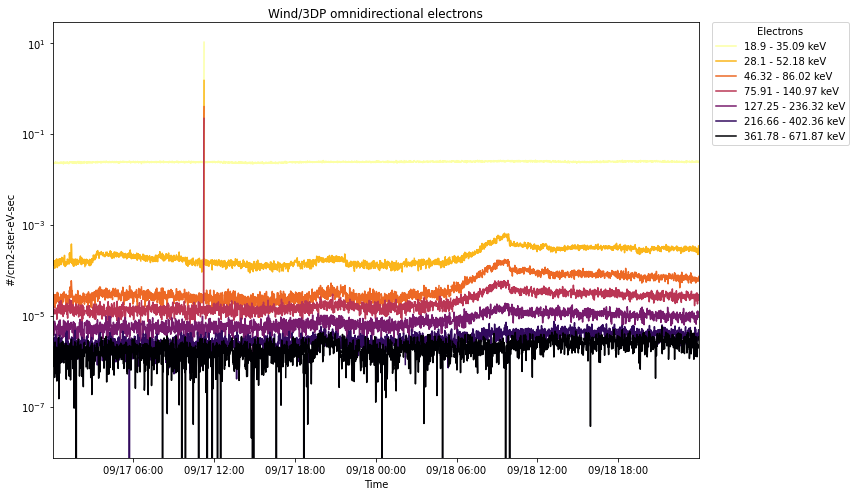

In [8]:
fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)

num_flux_columns = len(meta_wind_e['channels_dict_df'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.inferno_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_wind_e.index, df_wind_e[f'FLUX_{i}'], label=meta_wind_e['channels_dict_df']['Bins_Text'].values[i])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_wind_e['FLUX_UNITS'])
ax.set_title('Wind/3DP omnidirectional electrons')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Electrons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_wind_e.index[0], right=df_wind_e.index[-1])
plt.tight_layout()
plt.show()

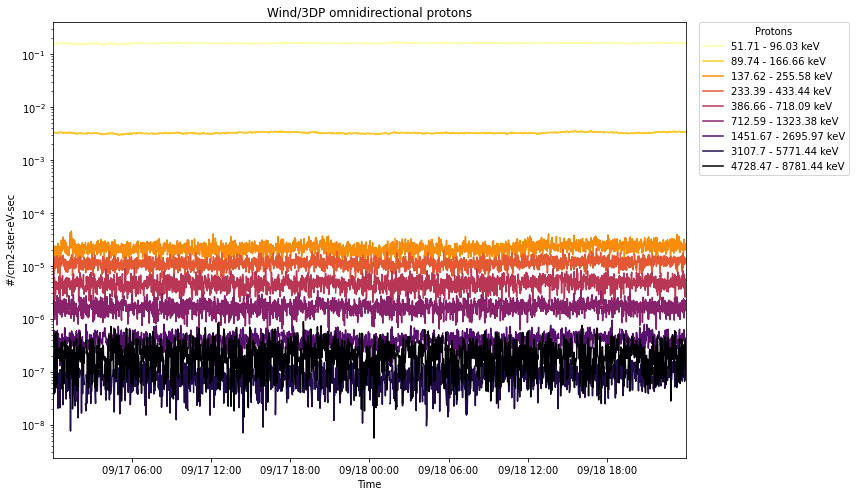

In [9]:
fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)

num_flux_columns = len(meta_wind_p['channels_dict_df'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.inferno_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_wind_p.index, df_wind_p[f'FLUX_{i}'], label=meta_wind_p['channels_dict_df']['Bins_Text'].values[i])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_wind_p['FLUX_UNITS'])
ax.set_title('Wind/3DP omnidirectional protons')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_wind_p.index[0], right=df_wind_p.index[-1])
plt.tight_layout()
plt.show()

---
# STEREO <a class="anchor" id="stereo-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for some STEREO instruments (i.e., magnetic field and charged particles). At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- ``'HET'``: STEREO IMPACT/HET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_HET)) 
- ``'LET'``: STEREO IMPACT/LET Level 1 Data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_LET))
- ``'MAG'``: STEREO IMPACT/MAG Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAG_SC))
- ``'MAGB'``: STEREO IMPACT/MAG Burst Mode (~0.03 sec) Magnetic Field Vectors (RTN or SC) ([Info RTN](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_RTN), [Info SC](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#STA_L1_MAGB_SC))
- ``'SEPT'``: STEREO IMPACT/SEPT Level 2 Data ([Info 1](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/about.txt), [Info 2](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/SEPT_L2_description.pdf)) [1]

[1] STEREO IMPACT/SEPT Level 2 data is directly obtained through ASCII files from the [server of the instrument team](http://www2.physik.uni-kiel.de/STEREO/data/sept/level2/), not via SunPy/CDAWeb.

#### Define options

-  ``instrument``: ``'HET'``, ``'LET'``, ``'MAG'``, ``'MAGB'``, or ``'SEPT'``. See above for explanation.
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``spacecraft``: String, optional. Name of STEREO spacecraft: ``'ahead'`` or ``'behind'``, by default ``'ahead'``.
-  ``mag_coord``: String, optional. Coordinate system for MAG: ``'RTN'`` or ``'SC'``, by default ``'RTN'``.
-  ``sept_species``: String, optional. Particle species for SEPT: ``'e'`` for electrons or ``'p'`` for protons (resp. ions), by default ``'e'``.
-  ``sept_viewing``: String, optional. Viewing direction for SEPT: ``'sun'``, ``'asun'``, ``'north'``, or ``'south'``, by default ``'sun'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/stereo/'``. By default ``None``. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data is resamepled. By default ``None``.
-  ``pos_timestamp``: String, optional. Change the position of the timestamp: ``'center'`` or ``'start'`` of the accumulation interval, or ``'original'`` to do nothing. By default ``center``.
-  ``max_conn``: Integer, optional. The number of parallel download slots used by ``Fido.fetch``, by default ``5``.

In [10]:
from seppy.loader.stereo import stereo_load

In [11]:
df_het, meta_het = stereo_load(instrument='HET',
                                startdate=start_time,
                                enddate=end_time,
                                spacecraft='ahead',
                                resample=cadence)

df_let, meta_let = stereo_load(instrument='LET',
                                startdate=start_time,
                                enddate=end_time,
                                spacecraft='ahead',
                                resample=cadence)

df_sept_e, meta_septs_e = stereo_load(instrument='SEPT',
                                    startdate=start_time,
                                    enddate=end_time,
                                    spacecraft='ahead',
                                    sept_species='e',
                                    resample=cadence)

df_sept_p, meta_septs_p = stereo_load(instrument='SEPT',
                                        startdate=start_time,
                                        enddate=end_time,
                                        spacecraft='ahead',
                                        sept_species='p',
                                        resample=cadence)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_het_20210917_v01.cdf:   0%|          | 0.00/215k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_het_20210918_v01.cdf:   0%|          | 0.00/215k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_let_20210917_v07.cdf:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_let_20210918_v07.cdf:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

100%|████████████████████████████████████████| 641k/641k [00:00<00:00, 583MB/s]


100%|████████████████████████████████████████| 641k/641k [00:00<00:00, 786MB/s]


100%|███████████████████████████████████████| 641k/641k [00:00<00:00, 1.20GB/s]


100%|█████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 1.42GB/s]


100%|█████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 3.16GB/s]


100%|█████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 1.55GB/s]

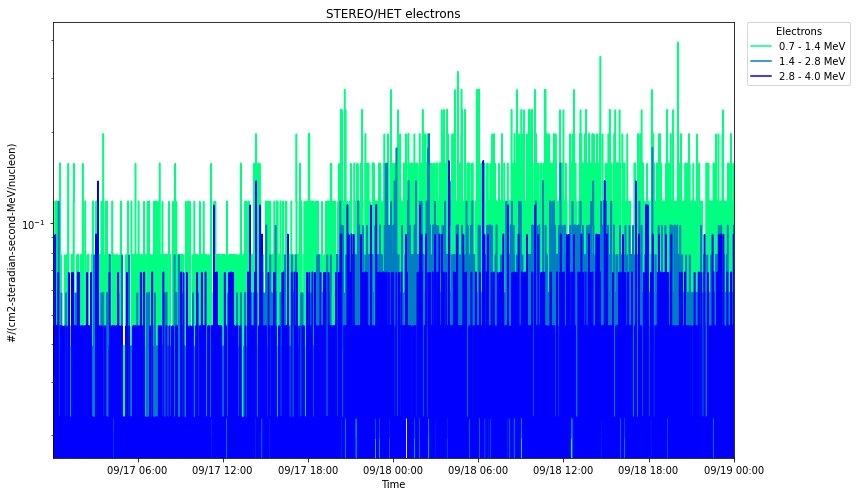

In [12]:
fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)

num_flux_columns = len(meta_het['Electron_Bins_Text'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.winter_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_het.index, df_het[f'Electron_Flux_{i}'], drawstyle='steps-mid', label=meta_het['Electron_Bins_Text'][i][0])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_het['Electron_Flux_UNITS'])
ax.set_title('STEREO/HET electrons')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Electrons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_het.index[0], right=df_het.index[-1])
fig.tight_layout()
plt.show()

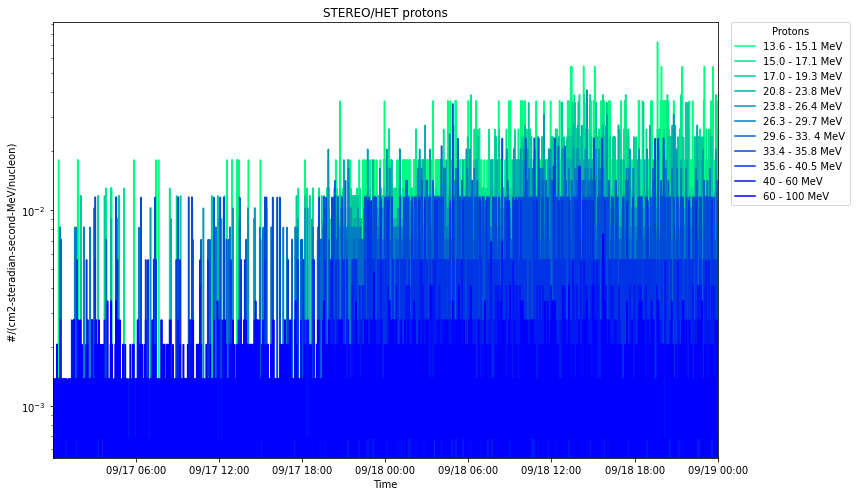

In [14]:
fig = plt.figure(figsize=[12,7])
ax = fig.add_subplot(111)

num_flux_columns = len(meta_het['Proton_Bins_Text'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.winter_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_het.index, df_het[f'Proton_Flux_{i}'], drawstyle='steps-mid', label=meta_het['Proton_Bins_Text'][i][0])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_het['Proton_Flux_UNITS'])
ax.set_title('STEREO/HET protons')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_het.index[0], right=df_het.index[-1])
fig.tight_layout()
plt.show()

---
# Parker Solar Probe/ISOIS <a class="anchor" id="psp-isois-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for PSP/ISOIS instrument. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:

- `PSP_ISOIS-EPIHI_L2-HET-RATES60`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET 1-minute Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES60), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates60_00000000_v01.skt))
- `PSP_ISOIS-EPIHI_L2-HET-RATES3600`: Parker Solar Probe ISOIS EPI-Hi Level 2 HET Hourly Rates ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPIHI_L2-HET-RATES3600), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epihi_l2-het-rates3600_00000000_v01.skt)) (higher coverage than 'RATES60' before mid-2021)
- `PSP_ISOIS-EPILO_L2-IC`: Parker Solar Probe ISOIS EPI-Lo Level 2 Ion Composition mode ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-IC), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epilo_l2-ic_00000000_v01.skt))
- `PSP_ISOIS-EPILO_L2-PE`: Parker Solar Probe ISOIS EPI-Lo Level 2 Particle Energy mode ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesP.html#PSP_ISOIS-EPILO_L2-PE), [Metadata](https://cdaweb.gsfc.nasa.gov/pub/software/cdawlib/0SKELTABLES/psp_isois-epilo_l2-pe_00000000_v01.skt))

Current caveats

- A lot of PSP/ISOIS datasets are not supported at the moment, for example:
 - PSP_ISOIS-EPIHI_L2-LET1-RATES60
 - PSP_ISOIS-EPIHI_L2-LET2-RATES60
- For EPIHI, energy values are only loaded from the first day of the interval! (For EPILO, energy values are the mean of the whole loaded interval.)
- EPILO energy tables changed on June 14, 2021.
- Some parts of the data files are skipped for performance reasons.
- Some multi-dimensional parts of the data files are skipped (user warning is provided in this cases).

#### Define options

-  ``dataset``: (see above for explanation)
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES60'``
 - ``'PSP_ISOIS-EPIHI_L2-HET-RATES3600'`` (higher coverage than ``'RATES60'`` before mid-2021)
 - ``'PSP_ISOIS-EPILO_L2-IC'``
 - ``'PSP_ISOIS-EPILO_L2-PE'``
-  ``startdate``, ``enddate``: datetime object or "standard" datetime string
-  ``resample``: Pandas frequency (e.g., ``'1min'`` or ``'1h'``), or ``None``, optional. Frequency to which the original data (~24 seconds) is resamepled. By default ``'1min'``.
-  ``path``: String, optional. Local path for storing downloaded data, e.g. ``path='data/psp/isois/'``. By default `None`. Default setting saves data according to [sunpy's Fido standards](https://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html#downloading-data).
-  ``epilo_channel``: String, optional. Only used for EPILO data. Channel of EPILO: 'E', 'F', 'G' (for 'EPILO PE'), or 'C', 'D', 'P', 'R', 'T' (for 'EPILO IC'). By default 'F'.
-  ``epilo_threshold``: Integer or float, optional. Only used for EPILO PE data. Replace all flux/countrate values in ``df`` above ``epilo_threshold`` with ``np.nan``, by default ``None``.
- ``all_columns`` : ``True`` or ``False`` (boolean), optional. Whether to return all columns of the datafile for EPILO (or skip usually unneeded columns for better performance), by default `False`.

In [6]:
from seppy.loader.psp import psp_isois_load

time_range = ['2021-09-17', '2021-09-19']

In [56]:
df_epihi, meta_epihi = psp_isois_load(dataset='PSP_ISOIS-EPIHI_L2-HET-RATES60',
                                        startdate=time_range[0],
                                        enddate=time_range[1],
                                        resample='1min')

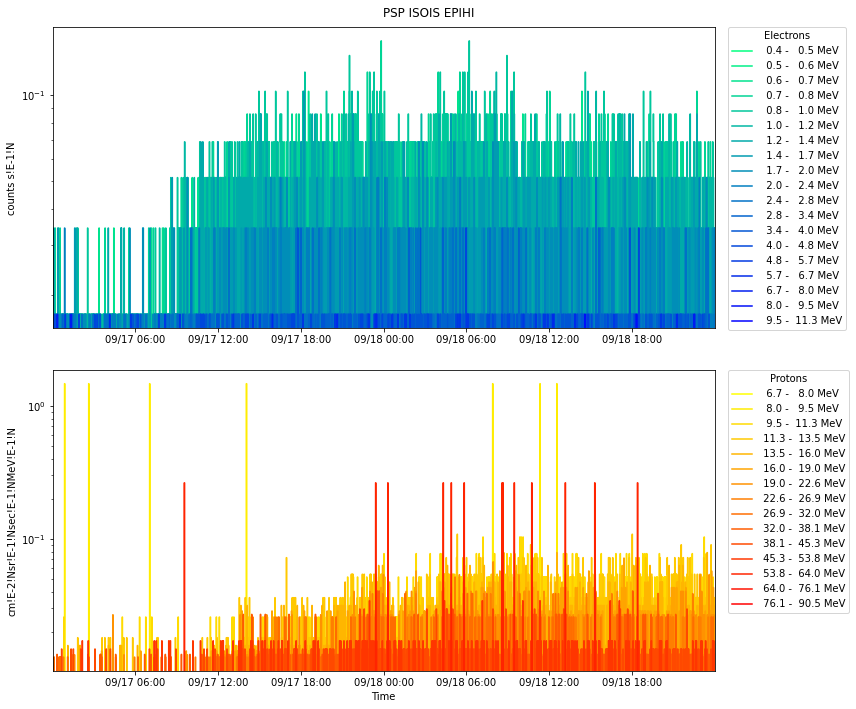

In [57]:
fig = plt.figure(figsize=[12,10])

ax = fig.add_subplot(211)
num_flux_columns = len(meta_epihi['Electrons_ENERGY_LABL'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.winter_r(np.linspace(0, 1, num_flux_columns)))

df_psp_epihi_e = df_epihi.filter(like='A_Electrons_Rate_')

for i in range(num_flux_columns):
    ax.plot(df_psp_epihi_e.index, df_psp_epihi_e[f'A_Electrons_Rate_{i}'], drawstyle='steps-mid', label=meta_epihi['Electrons_ENERGY_LABL'][i][0])

ax.set_yscale('log')
ax.set_ylabel(meta_epihi['Electrons_Rate_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Electrons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_psp_epihi_e.index[0], right=df_psp_epihi_e.index[-1])

ax = fig.add_subplot(212)
num_flux_columns = len(meta_epihi['H_ENERGY_LABL'])

df_psp_epihi_H = df_epihi.filter(like='A_H_Flux_')

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.autumn_r(np.linspace(0, 1, num_flux_columns)))
for i in range(num_flux_columns):
    ax.plot(df_psp_epihi_H.index, df_psp_epihi_H[f'A_H_Flux_{i}'], drawstyle='steps-mid', label=meta_epihi['H_ENERGY_LABL'][i][0])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_epihi['H_FLUX_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_psp_epihi_H.index[0], right=df_psp_epihi_H.index[-1])

fig.suptitle('PSP ISOIS EPIHI')
fig.subplots_adjust(hspace=0)
fig.tight_layout()
plt.show()

# Solar Orbiter EPD <a class="anchor" id="Solar_Orbiter_EPD"></a>

- GitHub: https://github.com/jgieseler/solo-epd-loader
- PyPI: https://pypi.org/project/solo-epd-loader
- conda: https://anaconda.org/conda-forge/solo-epd-loader

Python data loader for Solar Orbiter's (SolO) [Energetic Particle Detector (EPD)](http://espada.uah.es/epd/). At the moment provides level 2 (l2) and low latency (ll) data ([more details on data levels here](http://espada.uah.es/epd/EPD_data_overview.php)) obtained through CDF files from ESA's [Solar Orbiter Archive (SOAR)](http://soar.esac.esa.int/soar) for the following sensors:

- Electron Proton Telescope (EPT)
- High Energy Telescope (HET)
- SupraThermal Electrons and Protons (STEP)

**Current caveats of this software:**

- Only the standard ``rates`` data products are supported (i.e., no ``burst`` or ``high cadence`` data).
- Only electrons, protons and alpha particles are processed (i.e., for HET He3, He4, C, N, O, Fe are omitted at the moment).
- For STEP, the sectored data is only available for the updated data product (since Oct 22, 2021).
- The Suprathermal Ion Spectrograph (SIS) is not yet included.

**Input parameters**

-  ``sensor``: ``'ept'``, ``'het'``, or ``'step'`` (string)
-  ``level``: ``'ll'`` or ``'l2'`` (string)
-  ``startdate``, ``enddate``: Datetime object (e.g., ``dt.date(2021,12,31)`` or ``dt.datetime(2021,4,15)``) or integer of the form yyyymmdd with empty positions filled with zeros, e.g. ``20210415`` (if no ``enddate`` is provided, ``enddate = startdate`` will be used)
-  ``viewing``: ``'sun'``, ``'asun'``, ``'north'``, ``'south'``, or ``'omni'``  (string) or ``None``; not
   needed for ``sensor = 'step'``
-  ``path``: directory in which Solar Orbiter data is/should be
   organized; e.g. ``'/home/userxyz/solo/data/'`` (string). See section [Data folder structure](https://github.com/jgieseler/solo-epd-loader#data-folder-structure) in the documentation for more details.
-  ``autodownload``: if ``True`` will try to download missing data files
   from SOAR (bolean)

In [58]:
from solo_epd_loader import epd_load

In [67]:
color = {'sun':'crimson', 'asun':'orange', 'north':'darkslateblue', 'south':'c'}  # define some optional plotting settings or SolO/EPD colors
sensor = 'ept' # define the sensor to use
level = 'l2'   # define data level to use ('l2' or 'll')

In [68]:
df_protons_sun, df_electrons_sun, energies = epd_load(sensor=sensor,
                                                        level=level,
                                                        startdate=pd.Timestamp(time_range[0]),
                                                        enddate=pd.Timestamp(time_range[1]),
                                                        viewing='sun',
                                                        autodownload=True)

No corresponding data found at SOAR!


In [70]:
...

Ellipsis

---
# SOHO <a class="anchor" id="soho-loader"></a>

- GitHub: https://github.com/serpentine-h2020/SEPpy

Python data loader for SOHO particle instruments. At the moment provides released data obtained by SunPy through CDF files from CDAWeb for the following datasets:
 
-   ``'SOHO_COSTEP-EPHIN_L2-1MIN'``: SOHO COSTEP-EPHIN Level2 intensity 1 minute data ([Info](https://www.ieap.uni-kiel.de/et/ag-heber/costep/data.php)) [1]
-   ``'SOHO_COSTEP-EPHIN_L3I-1MIN'``: SOHO COSTEP-EPHIN Level3 intensity 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_COSTEP-EPHIN_L3I-1MIN))
-   ``'SOHO_ERNE-LED_L2-1MIN'``: SOHO ERNE-LED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-LED_L2-1MIN))
-   ``'SOHO_ERNE-HED_L2-1MIN'``: SOHO ERNE-HED Level2 1 minute data ([Info](https://cdaweb.gsfc.nasa.gov/misc/NotesS.html#SOHO_ERNE-HED_L2-1MIN))

[1] SOHO COSTEP-EPHIN Level2 intensity 1 minute data is directly obtained through ASCII files from the [server of the instrument team](http://ulysses.physik.uni-kiel.de/costep/level2/), not via SunPy/CDAWeb.

In [69]:
from seppy.loader.soho import soho_load

In [80]:
df_soho_ephin, meta_soho_ephin = soho_load(dataset='SOHO_COSTEP-EPHIN_L3I-1MIN',
                                            startdate=pd.Timestamp(time_range[0]),
                                            enddate=pd.Timestamp(time_range[1]),
                                            resample='1min')
df_soho_ephin = df_soho_ephin[time_range[0]:time_range[-1]]

df_soho_erne_led, meta_soho_erne_led = soho_load(dataset='SOHO_ERNE-LED_L2-1MIN',
                                                    startdate=pd.Timestamp(time_range[0]),
                                                    enddate=pd.Timestamp(time_range[1]),
                                                    resample='1min')

df_soho_erne_hed, meta_soho_erne_hed = soho_load(dataset='SOHO_ERNE-HED_L2-1MIN',
                                                    startdate=pd.Timestamp(time_range[0]),
                                                    enddate=pd.Timestamp(time_range[1]),
                                                    resample='1min')

Unable to obtain "SOHO_ERNE-LED_L2-1MIN" data!


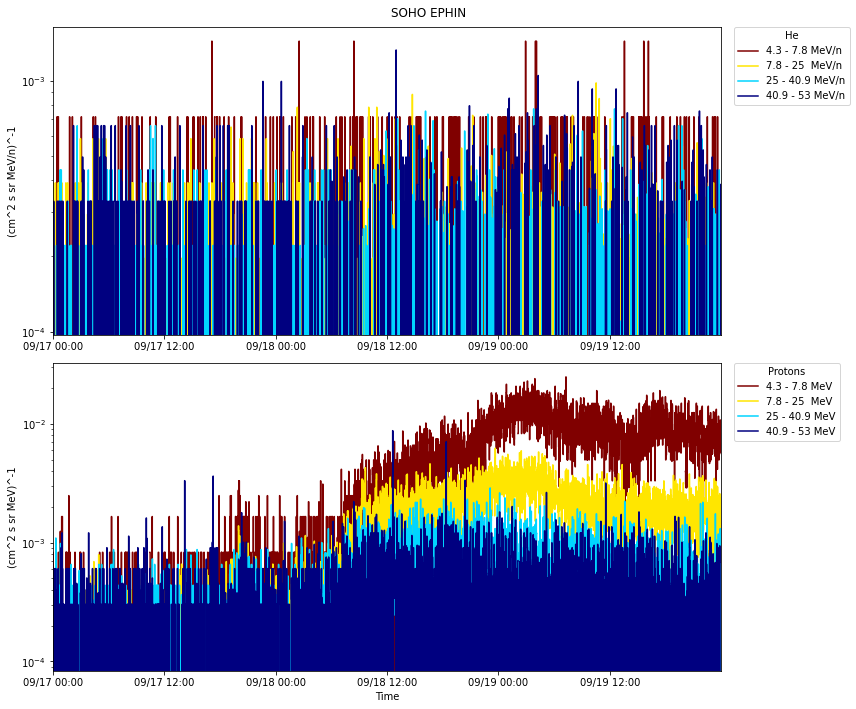

In [122]:
fig = plt.figure(figsize=[12,10])

ax = fig.add_subplot(211)
num_flux_columns = len(meta_soho_ephin['He_E_label'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.jet_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_soho_ephin.index, df_soho_ephin[f'He_int_{i}'], drawstyle='steps-mid', label=meta_soho_ephin['He_E_label'][i])

ax.set_yscale('log')
ax.set_ylabel(meta_soho_ephin['He_int_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='He')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_soho_ephin.index[0], right=df_soho_ephin.index[-1])


ax = fig.add_subplot(212)
num_flux_columns = len(meta_soho_ephin['P_E_label'])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.jet_r(np.linspace(0, 1, num_flux_columns)))
for i in range(num_flux_columns):
    ax.plot(df_soho_ephin.index, df_soho_ephin[f'P_int_{i}'], drawstyle='steps-mid', label=meta_soho_ephin['P_E_label'][i])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_soho_ephin['P_int_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_soho_ephin.index[0], right=df_soho_ephin.index[-1])

fig.suptitle('SOHO EPHIN')
fig.subplots_adjust(hspace=0)
fig.tight_layout()
plt.show()

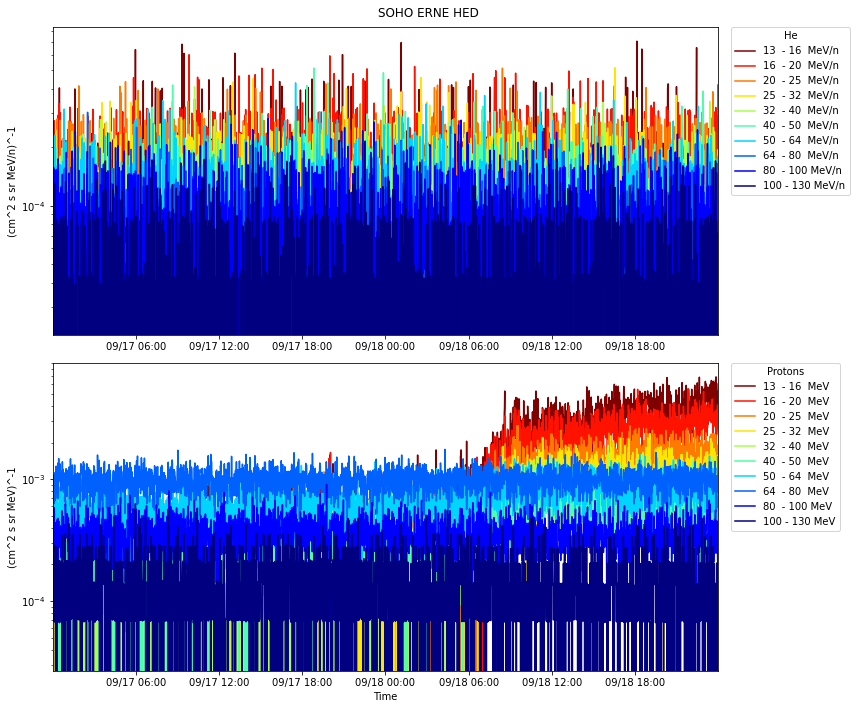

In [126]:
fig = plt.figure(figsize=[12,10])

ax = fig.add_subplot(211)
num_flux_columns = len(meta_soho_erne_hed['He_E_label'])

df_soho_erne_hed_He4_int = df_soho_erne_hed.filter(like='AH_')

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.jet_r(np.linspace(0, 1, num_flux_columns)))

for i in range(num_flux_columns):
    ax.plot(df_soho_erne_hed_He4_int.index, df_soho_erne_hed_He4_int[f'AH_{i}'], label=meta_soho_erne_hed['He_E_label'][i])

ax.set_yscale('log')
ax.set_ylabel(meta_soho_erne_hed['AH_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='He')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_soho_erne_hed_He4_int.index[0], right=df_soho_erne_hed_He4_int.index[-1])


ax = fig.add_subplot(212)
num_flux_columns = len(meta_soho_erne_hed['P_E_label'])

df_soho_erne_hed_H_int = df_soho_erne_hed.filter(like='PH_')

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.jet_r(np.linspace(0, 1, num_flux_columns)))
for i in range(num_flux_columns):
    ax.plot(df_soho_erne_hed_H_int.index, df_soho_erne_hed_H_int[f'PH_{i}'], label=meta_soho_erne_hed['P_E_label'][i])

ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel(meta_soho_erne_hed['PH_UNITS'])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, title='Protons')
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%m/%d %H:%M'))
ax.set_xlim(left=df_soho_erne_hed_H_int.index[0], right=df_soho_erne_hed_H_int.index[-1])

fig.suptitle('SOHO ERNE HED')
fig.subplots_adjust(hspace=0)
fig.tight_layout()
plt.show()

In [145]:
from cdasws import CdasWs

import os
os.environ['CDF_LIB'] = '/home/peijin/cdf/cdf38_0-dist/lib'

In [149]:
# help(CdasWs)

In [15]:
# cdas = CdasWs()

# dataset = 'SO_K0_ERN'

# # Edit the following var_names and example_interval 
# # variables to suit your needs.
# var_names = cdas.get_variable_names(dataset)
# print('Variable names:', var_names)

# example_interval = cdas.get_example_time_interval(dataset)
# print('Example time interval:', example_interval)

# status, data = cdas.get_data(dataset, var_names, example_interval)

In [16]:
time_range

['2021-09-17', '2021-09-19']

In [4]:
erne_vars = pyspedas.soho.erne(trange=time_range)

02-May-24 11:31:02: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2021/
02-May-24 11:31:03: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210917_v01.cdf to soho_data/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210917_v01.cdf
02-May-24 11:31:03: Download complete: soho_data/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210917_v01.cdf
02-May-24 11:31:04: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210918_v01.cdf to soho_data/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210918_v01.cdf
02-May-24 11:31:05: Download complete: soho_data/erne/hed_l2-1min/2021/soho_erne-hed_l2-1min_20210918_v01.cdf


In [5]:
erne_vars

['est', 'PH', 'AH', 'PHC', 'AHC']

In [11]:
xarray_erne_est = get_data('est', xarray=True, metadata=True)
xarray_erne_PH = get_data('PH', xarray=True, metadata=True)
xarray_erne_AH = get_data('AH', xarray=True, metadata=True)
xarray_erne_PHC = get_data('PHC', xarray=True, metadata=True)
xarray_erne_AHC = get_data('AHC', xarray=True, metadata=True)

In [17]:
...

Ellipsis

---
# GOES-R SEISS <a class="anchor" id="goes-seiss"></a>

- GitHub: https://cires-stp.github.io/goesr-spwx-examples/examples/seiss/seiss_example.html

In [18]:
import netCDF4 as nc
import numpy as np
import cftime
import os, sys
import requests
import matplotlib.pyplot as plt

In [82]:
time_range[0].split('-')

['2021', '09', '17']

In [83]:
year, month, day = time_range[0].split('-')

dir0 = './'
# file0 = "sci_mpsh-l2-avg1m_g16_d20200601_v1-0-2.nc"
file0 = f'dn_ephe-l2-orb1m_g17_d{year}{month}{day}_v0-0-3.nc'

# Download `file0` if it does not exist locally
if not os.path.exists(dir0 + file0):
    with open(dir0 + file0, "wb") as f:
#         url = f"https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/mpsh-l2-avg1m/2020/06/{file0}"
        url = f'https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes17/l2/data/ephe-l2-orb1m/{year}/{month}/{file0}'
        print('downloading: ', url)
        r = requests.get(url)
        f.write(r.content)

downloading:  https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes17/l2/data/ephe-l2-orb1m/2021/09/dn_ephe-l2-orb1m_g17_d20210917_v0-0-3.nc


In [ ]:
ds = nc.Dataset(dir0 + file0)
times = cftime.num2pydate(ds.variables["L2_SciData_TimeStamp"][:], ds["L2_SciData_TimeStamp"].units)

print("Filename:  ", file0)
print("start and end times:", times[0], times[-1])

In [26]:
print('All variable names:')
print(list(ds.variables.keys()), sep='\n')

All variable names:
['L2_SciData_TimeStamp', 'L1bRecordsInAvg', 'YawFlipFlag', 'EclipseFlag', 'AvgDiffProtonFlux', 'AvgDiffProtonFluxUncert', 'DiffProtonValidL1bSamplesInAvg', 'DiffProtonDQFdtcSum', 'DiffProtonDQFoobSum', 'DiffProtonDQFerrSum', 'AvgDiffElectronFlux', 'AvgDiffElectronFluxUncert', 'DiffElectronEffectiveEnergy', 'DiffElectronValidL1bSamplesInAvg', 'DiffElectronDQFdtcSum', 'DiffElectronDQFoobSum', 'DiffElectronDQFerrSum', 'AvgIntElectronFlux', 'AvgIntElectronFluxUncert', 'IntElectronEffectiveEnergy', 'IntValidL1bSamplesInAvg', 'IntDQFdtcSum', 'IntDQFoobSum', 'IntDQFerrSum', 'DiffProtonLowerEnergy', 'DiffProtonUpperEnergy', 'DiffProtonEffectiveEnergy', 'ExpectedLUTNotFound']


In [37]:
list(ds.variables.keys())

['L2_SciData_TimeStamp',
 'L1bRecordsInAvg',
 'YawFlipFlag',
 'EclipseFlag',
 'AvgDiffProtonFlux',
 'AvgDiffProtonFluxUncert',
 'DiffProtonValidL1bSamplesInAvg',
 'DiffProtonDQFdtcSum',
 'DiffProtonDQFoobSum',
 'DiffProtonDQFerrSum',
 'AvgDiffElectronFlux',
 'AvgDiffElectronFluxUncert',
 'DiffElectronEffectiveEnergy',
 'DiffElectronValidL1bSamplesInAvg',
 'DiffElectronDQFdtcSum',
 'DiffElectronDQFoobSum',
 'DiffElectronDQFerrSum',
 'AvgIntElectronFlux',
 'AvgIntElectronFluxUncert',
 'IntElectronEffectiveEnergy',
 'IntValidL1bSamplesInAvg',
 'IntDQFdtcSum',
 'IntDQFoobSum',
 'IntDQFerrSum',
 'DiffProtonLowerEnergy',
 'DiffProtonUpperEnergy',
 'DiffProtonEffectiveEnergy',
 'ExpectedLUTNotFound']

In [39]:
ds.variables['AvgIntElectronFlux']

<class 'netCDF4._netCDF4.Variable'>
float32 AvgIntElectronFlux(record_number, telescopes)
    _FillValue: -1e+31
    long_name: Time-averaged electron fluxes in the E11 >2 MeV integral channel
    units: electrons/(cm^2 sr s)
    valid_min: 0.0
    valid_max: 1000000.0
unlimited dimensions: record_number
current shape = (1440, 5)
filling on

In [43]:
data_e = []

for i in range(0, len(times)):
    data_e.append(ds.variables['AvgIntElectronFlux'][i][tel])

In [46]:
ds.variables['AvgDiffProtonFlux']

<class 'netCDF4._netCDF4.Variable'>
float32 AvgDiffProtonFlux(record_number, telescopes, proton_diff_chans)
    _FillValue: -1e+31
    long_name: Time-averaged proton fluxes in several differential channels between 80 and 10,000 keV
    units: protons/(cm^2 sr keV s)
    valid_min: 0.0
    valid_max: 460000.0
unlimited dimensions: record_number
current shape = (1440, 5, 11)
filling on

In [54]:
ds.variables['AvgDiffProtonFlux'].shape

(1440, 5, 11)

In [53]:
ds.variables['AvgDiffProtonFlux'][0].shape

(5, 11)

In [57]:
ds.variables['AvgDiffProtonFlux'][0][0].shape

(11,)

In [68]:
ds.variables['AvgDiffProtonFlux']

<class 'netCDF4._netCDF4.Variable'>
float32 AvgDiffProtonFlux(record_number, telescopes, proton_diff_chans)
    _FillValue: -1e+31
    long_name: Time-averaged proton fluxes in several differential channels between 80 and 10,000 keV
    units: protons/(cm^2 sr keV s)
    valid_min: 0.0
    valid_max: 460000.0
unlimited dimensions: record_number
current shape = (1440, 5, 11)
filling on

In [77]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, Spase v2.2.6
    title: L2 SEISS/MPS-HI - 1-minute Flux Averages
    summary: The GOES-R Magnetospheric Electrons and Protons: Medium and High Energy (MPSH) Product consists of fluxes of medium and high energy electrons and protons derived from in situ measurements of electron and proton count rates. The Magnetospheric Particle Sensor High (MPS-HI) makes these measurements. MPS-HI consists of ten solid state telescopes, five for electrons and five for protons. Collectively, the five telescopes per species, each with a 30 degree conical field-of-view, span a total angular range of 170 degrees in the Y-Z plane, arranged north-to-south in a fan. The central telescope has an anti-earthward look-angle parallel to the minus Z-axis (in spacecraft body-reference- frame coordinates). Neighboring telescope centers are separated by 35 degrees. The north-to-south order of telescope numb

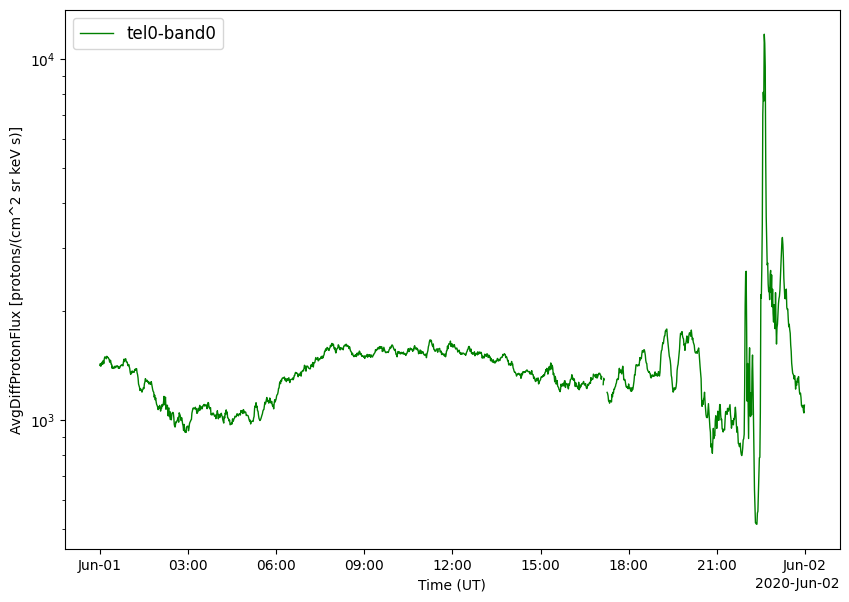

In [35]:
var = 'AvgDiffProtonFlux'
telescope = 0
band = 0
data_p = []

for i in range(0, len(times)):
    data_p.append(ds.variables[var][i][telescope][band])

plt.figure(figsize=[10,7])
plt.plot(times[:], data_p,
            linewidth=1,
            label=f'tel{telescope}-band{band}')
plt.yscale('log')
plt.legend(loc='best', prop={'size':12})
plt.xlabel('Time (UT)')
plt.ylabel(f'{var} [{ds[var].units}]')
plt.show()

In [107]:
year, month, day = time_range[0].split('-')

dir0 = './'
file0 = f'sci_mpsh-l2-avg1m_g17_d{year}{month}{day}_v1-0-3.nc'

# Download `file0` if it does not exist locally
if not os.path.exists(dir0 + file0):
    with open(dir0 + file0, "wb") as f:
        url = f'https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes17/l2/data/mpsh-l2-avg1m/{year}/{month}/{file0}'
        print('downloading: ', url)
        r = requests.get(url)
        f.write(r.content)

In [108]:
ds = nc.Dataset(dir0 + file0)

In [158]:
ds.instrument

'Space Environment In-Situ Suite (SEISS) Magnetospheric Particle Sensor High (MPS-HI)'

In [157]:
ds.variables['AvgDiffProtonFlux'].long_name

'Time-averaged proton fluxes in several differential channels between 80 and 10,000 keV'

In [167]:
ds.variables['AvgDiffProtonFlux']

<class 'netCDF4._netCDF4.Variable'>
float32 AvgDiffProtonFlux(record_number, telescopes, proton_diff_chans)
    _FillValue: -1e+31
    long_name: Time-averaged proton fluxes in several differential channels between 80 and 10,000 keV
    units: protons/(cm^2 sr keV s)
    valid_min: 0.0
    valid_max: 460000.0
unlimited dimensions: record_number
current shape = (1440, 5, 11)
filling on

In [146]:
[x for x in dir(ds.variables['AvgDiffProtonFlux']) if not x.startswith('_')]

['always_mask',
 'assignValue',
 'chartostring',
 'chunking',
 'datatype',
 'delncattr',
 'dimensions',
 'dtype',
 'endian',
 'filters',
 'getValue',
 'get_dims',
 'get_var_chunk_cache',
 'getncattr',
 'group',
 'long_name',
 'mask',
 'name',
 'ncattrs',
 'ndim',
 'quantization',
 'renameAttribute',
 'scale',
 'set_always_mask',
 'set_auto_chartostring',
 'set_auto_mask',
 'set_auto_maskandscale',
 'set_auto_scale',
 'set_collective',
 'set_ncstring_attrs',
 'set_var_chunk_cache',
 'setncattr',
 'setncattr_string',
 'setncatts',
 'shape',
 'size',
 'units',
 'use_nc_get_vars',
 'valid_max',
 'valid_min']

In [128]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, Spase v2.2.6
    title: L2 SEISS/MPS-HI - 1-minute Flux Averages
    summary: The GOES-R Magnetospheric Electrons and Protons: Medium and High Energy (MPSH) Product consists of fluxes of medium and high energy electrons and protons derived from in situ measurements of electron and proton count rates. The Magnetospheric Particle Sensor High (MPS-HI) makes these measurements. MPS-HI consists of ten solid state telescopes, five for electrons and five for protons. Collectively, the five telescopes per species, each with a 30 degree conical field-of-view, span a total angular range of 170 degrees in the Y-Z plane, arranged north-to-south in a fan. The central telescope has an anti-earthward look-angle parallel to the minus Z-axis (in spacecraft body-reference- frame coordinates). Neighboring telescope centers are separated by 35 degrees. The north-to-south order of telescope numb

In [110]:
list(ds.variables.keys())

['L2_SciData_TimeStamp',
 'L1bRecordsInAvg',
 'YawFlipFlag',
 'EclipseFlag',
 'AvgDiffProtonFlux',
 'AvgDiffProtonFluxUncert',
 'DiffProtonValidL1bSamplesInAvg',
 'DiffProtonDQFdtcSum',
 'DiffProtonDQFoobSum',
 'DiffProtonDQFerrSum',
 'AvgDiffElectronFlux',
 'AvgDiffElectronFluxUncert',
 'DiffElectronEffectiveEnergy',
 'DiffElectronValidL1bSamplesInAvg',
 'DiffElectronDQFdtcSum',
 'DiffElectronDQFoobSum',
 'DiffElectronDQFerrSum',
 'AvgIntElectronFlux',
 'AvgIntElectronFluxUncert',
 'IntElectronEffectiveEnergy',
 'IntValidL1bSamplesInAvg',
 'IntDQFdtcSum',
 'IntDQFoobSum',
 'IntDQFerrSum',
 'DiffProtonLowerEnergy',
 'DiffProtonUpperEnergy',
 'DiffProtonEffectiveEnergy',
 'ExpectedLUTNotFound']

In [120]:
times = cftime.num2pydate(ds.variables['L2_SciData_TimeStamp'][:], ds['L2_SciData_TimeStamp'].units)

print('Filename:  ', file0)
print('start and end times:', times[0], times[-1])

Filename:   sci_mpsh-l2-avg1m_g17_d20210917_v1-0-3.nc
start and end times: 2021-09-17 00:00:00 2021-09-17 23:59:00


16

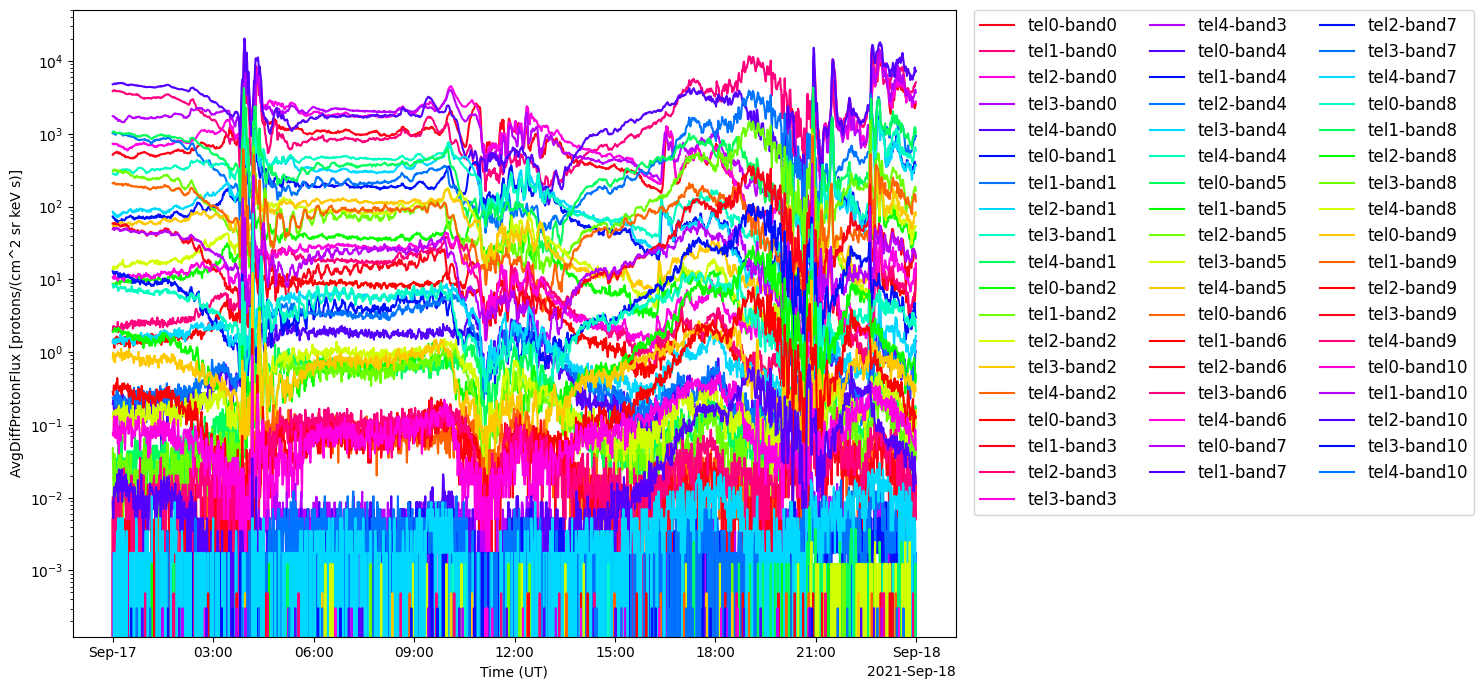

In [127]:
var = 'AvgDiffProtonFlux'
data = ds.variables[var]

telescopes = ds.variables[var].shape[1]
bands = ds.variables[var].shape[2]

# for i in range(0, len(times)):
#     data_p.append(ds.variables[var][i][telescope][band])

# plt.figure(figsize=[15,7])
# plt.plot(times[:], data_p,
#             linewidth=1,
#             label=f'tel{telescope}-band{band}')


fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,n)), i.e. in n parts
ax.set_prop_cycle('color', plt.cm.hsv_r(np.linspace(0, 1, telescopes + bands)))

for k in range(bands):
    for j in range(telescopes):
        data_p = []
        for i in range(len(times)):
            data_p.append(ds.variables[var][i][j][k])
    
        ax.plot(times, data_p, label=f'tel{j}-band{k}')

ax.set_yscale('log')
ax.legend(loc=2, prop={'size':12}, bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=3)
ax.set_xlabel('Time (UT)')
ax.set_ylabel(f'{var} [{ds[var].units}]')
fig.tight_layout()
plt.show()

In [70]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/mnedal/sunpy/data'